In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#importing data sets
train23 = pd.read_csv('train_feature_23variables.csv')
train10 = pd.read_csv('train_feature_10variables.csv')

test23 = pd.read_csv('test_feature_23variables.csv')
test10 = pd.read_csv('test_feature_10variables.csv')

In [ ]:
test23.groupby('isFraud').count()

,Unnamed: 0,cashout_lag,oldbalanceOrg,amount,newbalanceDest,transfer_lag,oldbalanceDest,newbalanceOrig,fraud_count,TRANSFER,...,cashin_lag,debit_lag,fraudcount_lag6,fraudcount_lag1,fraudcount_lag7,fraudcount_lag9,fraudcount_lag8,fraudcount_lag2,fraudcount_lag5,fraudcount_lag3
isFraud,,,,,,,,,,,,,,,,,,,,,
0,65196,65196,65196,65196,65196,65196,65196,65196,65196,65196,...,65196,65196,65196,65196,65196,65196,65196,65196,65196,65196
1,748,748,748,748,748,748,748,748,748,748,...,748,748,748,748,748,748,748,748,748,748


Training set and Test set creation

In [ ]:
X_train23 = train23.drop(['Unnamed: 0','isFraud'],axis = 1) 

In [ ]:
y_train23 = train23['isFraud']

In [ ]:
X_train10 = train10.drop(['Unnamed: 0','isFraud'],axis = 1) 
y_train10 = train10['isFraud']

Test set

In [ ]:
X_test23 = test23.drop(['Unnamed: 0','isFraud'],axis = 1) 
y_test23 = test23['isFraud']

In [ ]:
X_test10 = test10.drop(['Unnamed: 0','isFraud'],axis = 1) 
y_test10 = test10['isFraud']

In [ ]:

from sklearn.tree import DecisionTreeClassifier
#importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold

In [ ]:
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train23,y_train23)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_train_pred = clf.predict(X_train23)
y_test_pred = clf.predict(X_test23)

In [ ]:
print(accuracy_score(y_train23,y_train_pred))
print(accuracy_score(y_test23,y_test_pred))


1.0
0.8393485381535849


In [ ]:
# Clearly Overfitted

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'max_depth': [2,4,6,8,10,12],
            'min_samples_split':[2,3,4],
           'min_samples_leaf':[1,2]
    
}
clf = DecisionTreeClassifier()
gscv = GridSearchCV(estimator = clf, param_grid= params)
gscv.fit(X_train23,y_train23)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
y_predF_test = gscv.predict(X_test23)

In [ ]:
#confusion matrix
print(confusion_matrix(y_test23,y_predF_test))
print(classification_report(y_test23,y_predF_test))

[[54821 10375]
 [  240   508]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     65196
           1       0.05      0.68      0.09       748

    accuracy                           0.84     65944
   macro avg       0.52      0.76      0.50     65944
weighted avg       0.98      0.84      0.90     65944



In [ ]:
# Accuracy is low when compared to other 2 models

In [ ]:
test23

,Unnamed: 0,cashout_lag,oldbalanceOrg,amount,newbalanceDest,transfer_lag,oldbalanceDest,newbalanceOrig,fraud_count,TRANSFER,...,debit_lag,fraudcount_lag6,fraudcount_lag1,fraudcount_lag7,fraudcount_lag9,fraudcount_lag8,fraudcount_lag2,fraudcount_lag5,fraudcount_lag3,isFraud
0,0,8.269757e+05,1536733.52,1536733.52,0.00,8.269757e+05,0.00,0.0,6,1.0,...,1318.25,8.0,8.0,18.0,8.0,12.0,8.0,12.0,10.0,1
1,1,8.269757e+05,1536733.52,1536733.52,1780883.67,8.269757e+05,244150.15,0.0,6,0.0,...,1318.25,8.0,8.0,18.0,8.0,12.0,8.0,12.0,10.0,1
2,2,8.269757e+05,194876.96,194876.96,0.00,8.269757e+05,0.00,0.0,6,1.0,...,1318.25,8.0,8.0,18.0,8.0,12.0,8.0,12.0,10.0,1
3,3,8.269757e+05,194876.96,194876.96,343221.07,8.269757e+05,148344.11,0.0,6,0.0,...,1318.25,8.0,8.0,18.0,8.0,12.0,8.0,12.0,10.0,1
4,4,8.269757e+05,749316.70,749316.70,0.00,8.269757e+05,0.00,0.0,6,1.0,...,1318.25,8.0,8.0,18.0,8.0,12.0,8.0,12.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65939,65939,2.189978e+06,339682.13,339682.13,339682.13,2.189978e+06,0.00,0.0,8,0.0,...,0.00,10.0,14.0,14.0,8.0,12.0,22.0,10.0,6.0,1
65940,65940,2.189978e+06,6311409.28,6311409.28,0.00,2.189978e+06,0.00,0.0,8,1.0,...,0.00,10.0,14.0,14.0,8.0,12.0,22.0,10.0,6.0,1
65941,65941,2.189978e+06,6311409.28,6311409.28,6379898.11,2.189978e+06,68488.84,0.0,8,0.0,...,0.00,10.0,14.0,14.0,8.0,12.0,22.0,10.0,6.0,1
65942,65942,2.189978e+06,850002.52,850002.52,0.00,2.189978e+06,0.00,0.0,8,1.0,...,0.00,10.0,14.0,14.0,8.0,12.0,22.0,10.0,6.0,1


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'max_depth': [2,4,6,8,10,12],
            'min_samples_split':[2,3,4],
           'min_samples_leaf':[1,2]
    
}
clf = DecisionTreeClassifier()
gscv = GridSearchCV(estimator = clf, param_grid= params)
gscv.fit(X_train10,y_train10)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
y_predF_test = gscv.predict(X_test10)

In [ ]:
#confusion matrix
print(confusion_matrix(y_test10,y_predF_test))
print(classification_report(y_test10,y_predF_test))

[[54809 10387]
 [   50   698]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     65196
           1       0.06      0.93      0.12       748

    accuracy                           0.84     65944
   macro avg       0.53      0.89      0.52     65944
weighted avg       0.99      0.84      0.90     65944



In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

### Undersampling

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler 
under_sampler = RandomUnderSampler(0.8)
X_train_us, y_train_us = under_sampler.fit_resample(X_train10, y_train10)
print(" The number of class before thw fit {}".format(Counter((y_train10))))
print(" The number of class after thw fit {}".format(Counter((y_train_us))))

 The number of class before thw fit Counter({0: 270536, 1: 2188})
 The number of class after thw fit Counter({0: 2735, 1: 2188})


C:\Users\ACER\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [ ]:
# XG Boost with parameter tuning (23 variable case)

bestF = gscv.fit(X_train_us, y_train_us)

In [ ]:
y_predF = bestF.predict(X_test10)
print(confusion_matrix(y_test10,y_predF))
print(classification_report(y_test10,y_predF))

[[63825  1371]
 [   12   736]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     65196
           1       0.35      0.98      0.52       748

    accuracy                           0.98     65944
   macro avg       0.67      0.98      0.75     65944
weighted avg       0.99      0.98      0.98     65944



In [ ]:
rf_probs = bestF.predict_proba(X_test10)
rf_probs = rf_probs[:,1]


rf_auc = roc_auc_score(y_test10,y_predF)


print(rf_auc)


0.9814641608864819


In [ ]:
# Area under the curve is considerably less than other models
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

rf_fpr,rf_tpr,_ = roc_curve(y_test10,y_predF)

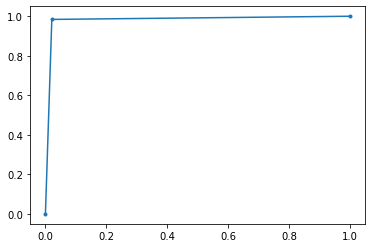

In [ ]:

plt.plot(rf_fpr,rf_tpr,marker='.')

In [ ]:
threshold = 0.005

predicted_proba = bestF.predict_proba(X_test10)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

print(confusion_matrix(y_test10, predicted))
print(classification_report(y_test10, predicted))

[[63574  1622]
 [   11   737]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     65196
           1       0.31      0.99      0.47       748

    accuracy                           0.98     65944
   macro avg       0.66      0.98      0.73     65944
weighted avg       0.99      0.98      0.98     65944



### Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(0.5)
X_train_os,y_train_os = over_sampler.fit_resample(X_train10, y_train10)
print(" The number of class before thw fit {}".format(Counter((y_train230))))
print(" The number of class after thw fit {}".format(Counter((y_train_os))))

C:\Users\ACER\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


 The number of class before thw fit Counter({0: 270536, 1: 2188})
 The number of class after thw fit Counter({0: 270536, 1: 135268})


In [ ]:
# DecisonTree with parameter tuning (23 variable case)

bestF = gscv.fit(X_train_os, y_train_os)

In [ ]:
y_predF = bestF.predict(X_test10)
print(confusion_matrix(y_test10,y_predF))
print(classification_report(y_test10,y_predF))

[[64914   282]
 [   49   699]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65196
           1       0.71      0.93      0.81       748

    accuracy                           0.99     65944
   macro avg       0.86      0.97      0.90     65944
weighted avg       1.00      0.99      1.00     65944



In [ ]:
rf_probs = bestF.predict_proba(X_test10)
rf_probs = rf_probs[:,1]


rf_auc = roc_auc_score(y_test10,y_predF)


print(rf_auc)

0.96508327993614


In [ ]:

rf_fpr,rf_tpr,_ = roc_curve(y_test23,y_predF)

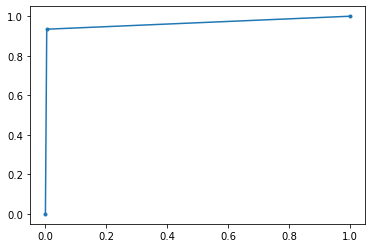

In [ ]:

plt.plot(rf_fpr,rf_tpr,marker='.')

In [ ]:
threshold = 0.005

predicted_proba = bestF.predict_proba(X_test10)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

print(confusion_matrix(y_test10,predicted))
print(classification_report(y_test10, predicted))

[[63668  1528]
 [   47   701]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     65196
           1       0.31      0.94      0.47       748

    accuracy                           0.98     65944
   macro avg       0.66      0.96      0.73     65944
weighted avg       0.99      0.98      0.98     65944



### Synthetic Sampling

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
os = SMOTETomek(0.5)
X_train_ns,y_train_ns = os.fit_resample(X_train10,y_train10)
print(" The number of class before thw fit {}".format(Counter((y_train10))))
print(" The number of class after thw fit {}".format(Counter((y_train_ns))))

C:\Users\ACER\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


 The number of class before thw fit Counter({0: 270536, 1: 2188})
 The number of class after thw fit Counter({0: 270465, 1: 135197})


In [ ]:
# XGB with parameter tuning (23 variable case)

bestF = gscv.fit(X_train_us, y_train_us)

In [ ]:
y_predF = bestF.predict(X_test10)
print(confusion_matrix(y_test10,y_predF))
print(classification_report(y_test23,y_predF))

[[54350 10846]
 [   11   737]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     65196
           1       0.06      0.99      0.12       748

    accuracy                           0.84     65944
   macro avg       0.53      0.91      0.51     65944
weighted avg       0.99      0.84      0.90     65944



In [ ]:
rf_probs = bestF.predict_proba(X_test23)
rf_probs = rf_probs[:,1]


rf_auc = roc_auc_score(y_test23,y_predF)


print(rf_auc)

0.9094671091333644


In [ ]:

rf_fpr,rf_tpr,_ = roc_curve(y_test23,y_predF)

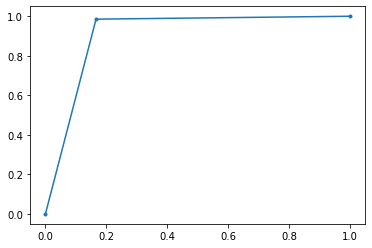

In [ ]:

plt.plot(rf_fpr,rf_tpr,marker='.')


In [ ]:
threshold = 0.2

predicted_proba = bestF.predict_proba(X_test23)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

print(confusion_matrix(y_test23,predicted))
print(classification_report(y_test23, predicted))

[[53565 11631]
 [    8   740]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     65196
           1       0.06      0.99      0.11       748

    accuracy                           0.82     65944
   macro avg       0.53      0.91      0.51     65944
weighted avg       0.99      0.82      0.89     65944

